Linear regression is a very simple approach for machine learning which is a useful tool for predicting quantitative responses. Although it may seem somewhat dull in comparison, it is a widely used statistical learning method that serves as a good jumping-off point for new approaches. Many fancy statistical learning approaches can be seen as a generalization or extension of linear regression. 

Recall the **Advertising** dataset which has *sales* of a product as a function of three advertising budgets: *TV*, *radio*, and *newspaper*. Suppose we are asked to suggest a marketing plan for the next year that will result in high product sales. What information would be useful in order to provide such a recommendation?  
1. Is there a relationship between advertising budget and sales?  
2. How strong is the relationship between advertising budet and sales?  
3. Which media contribute to sales?  
4. How accurately can we estimate the effect of each medium on sales?  
5. How accurately can we predict future sales?  
6. Is the relationship linear?  
7. Is there synergy among the advertising media?  

# Simple Linear Regression
This is a very straightforward approach for predicting a quantitative response $Y$ on the basis of a single predictor $X$. It assumes that there is approximately a linear relationship between $X$ and $Y$:  

$$Y \approx \beta_0 + \beta_1X$$  
The $\approx$ can be read as *"is approximately modeled as"* or can be described as *regressing $Y$ on $X$*. We can regress *sales* on *TV* by fitting the model:  

$$sales \approx \beta_0 + \beta_1 \times TV$$  
$\beta_0$ and $\beta_1$ are the unknown coefficients (parameters) that represent *intercept* and *slope* respectively in the linear model. Once we've used our training data to produce estimates for $\widehat{\beta}_0$ and $\widehat{\beta}_1$ we can predict future sales for a particular value of TV advertising with:  

$$\widehat{y} = \widehat{\beta}_0 + \widehat{\beta}_1x$$
where $\widehat{y}$ indicates a prediction of $Y$ on the basis of $X = x$. The *hat* symbol ($\widehat{ }$) denotes the estimated value for an unknown parameter, coefficient, or predicted value of a response.

## Estimating the Coefficients
Since $\beta_0$ and $\beta_1$ are usually unknown, we must use data to estimate them. Let $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$ be the $n$ observation pairs. Our goal is to obtain coefficient estimates $\widehat{\beta}_0$ and $\widehat{\beta}_1$ such that the linear model fits the available data well, that is $y_i \approx \widehat{\beta}_0 + \widehat{\beta}_1x_i$ for $i = 1, ..., n$. There are many ways of measuring *closeness*, but the most common approach involves minimizing the *least squares* criterion.  

Let $\widehat{y}_i = \widehat{\beta}_0 + \widehat{\beta}_1x_i$ be the prediction for $Y$ based on the $i$th value of $X$. Then $e_i = y_i - \widehat{y}_i$ represents the *residual error* or the difference between the $i$th observed response and the $i$th predicted response from the linear model. We define the *residual sum of squares* (RSS) as:  

$$RSS = e_1^2 + e_2^2 + ... + e_n^2$$
or equivalently:  

$$RSS = (y_1 - \widehat{\beta}_0 - \widehat{\beta}_1x_1)^2 + (y_2 - \widehat{\beta}_0 - \widehat{\beta}_1x_2)^2 + ... + (y_n - \widehat{\beta}_0 - \widehat{\beta}_1x_n)^2 = \sum_{i=1}^n(y_i - \widehat{\beta}_0 - \widehat{\beta}_1x_i)^2$$

### (Supplement) Deriving the Simple Linear Regression Coefficients
$RSS$ will be minimized at the values of $\widehat{\beta}_0$ and $\widehat{\beta}_1$ for which $\frac{\partial{RSS}}{\partial{\widehat{\beta}_0}} = 0$ and $\frac{\partial{RSS}}{\partial{\widehat{\beta}_1}} = 0$. Let's start with $\frac{\partial{RSS}}{\partial{\widehat{\beta}_0}}$:  

$$\frac{\partial{RSS}}{\partial{\widehat{\beta}_0}} = \sum_{i=1}^n2(y_i - \widehat{\beta}_0 - \widehat{\beta}_1x_i) = 2(n\widehat{\beta}_0 + \widehat{\beta}_1\sum_{i=1}^nx_i - \sum_{i=1}^ny_i) = 0$$  
If we divide through by 2 and $n$ then use the sample means definitions $\bar{x} \equiv \frac{1}{n}\sum_{i=1}^nx_i$ and $\bar{y} \equiv \frac{1}{n}\sum_{i=1}^ny_i$, this equation can be rewritten as:  

$$\widehat{\beta}_0 - \bar{y} - \widehat{\beta}_1\bar{x}$$
Now for $\frac{\partial{RSS}}{\partial{\widehat{\beta}_1}}$:  

$$\frac{\partial{RSS}}{\partial{\widehat{\beta}_1}} = \sum_{i=1}^n-2x_i(y_i - \widehat{\beta}_0 - \widehat{\beta}_1x_i) = \sum_{i=1}^n-2(x_iy_i - \widehat{\beta}_0x_i - \widehat{\beta}_1x_i^2) = 0$$
Substuting the equation for $\widehat{\beta}_0$ from above into this equation we get:  

$$\sum_{i=1}^n(x_iy_i - x_i\bar{y} + \widehat{\beta}_1x_i\bar{x} - \widehat{\beta}_1x_i^2) = 0$$
This can be separated into two sums:  

$$\sum_{i=1}^n(x_iy_i - x_i\bar{y}) - \widehat{\beta}_1\sum_{i=1}^n(x_i^2 - x_i\bar{x}) = 0$$  
Solving for $\widehat{\beta}_1$ we get:  

$$\widehat{\beta}_1 = \frac{\sum_{i=1}^n(x_iy_i - x_i\bar{y})}{\sum_{i=1}^n(x_i^2 - x_i\bar{x})} = \frac{\sum_{i=1}^n(x_iy_i) - n\bar{x}\bar{y}}{\sum_{i=1}^n(x_i^2) - n\bar{x}^2}$$
Using these zero identities:  

$$\sum_{i=1}^n(\bar{x}^2 - x_i\bar{x}) = 0 \qquad\text{and}\qquad \sum_{i=1}^n(\bar{x}\bar{y} - y_i\bar{x}) = 0,$$  
we can translate the previous equation into a more intuitively obvious form:  

$$\widehat{\beta}_1 = \frac{\sum_{i=1}^n(x_iy_i - x_i\bar{y}) + \sum_{i=1}^n(\bar{x}\bar{y} - y_i\bar{x})}{\sum_{i=1}^n(x_i^2 - x_i\bar{x}) + \sum_{i=1}^n(\bar{x}^2 - x_i\bar{x})},$$  
Which can be factorized into the final form of $\widehat{\beta}_1$:  

$$\boxed{\widehat{\beta}_1 = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}}$$  
And for $\widehat{\beta}_0$:  

$$\boxed{\widehat{\beta}_0 = \bar{y} - \widehat{\beta}_1\bar{x}}$$  

These two equations define the *least squares coefficient estimates* for simple linear regression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

In [2]:
#read the data and separate the predictor and response to numpy arrays
advertising = pd.read_csv('../../data/Advertising.csv', index_col=0)
X = np.array(advertising['TV'])
y = np.array(advertising['sales'])
#calculate the least squares coefficients
b1 = ((X - X.mean()) * (y - y.mean())).sum() / ((X - X.mean())**2).sum()
b0 = y.mean() - b1 * X.mean()
print('Intercept: {:.2f}\nSlope: {:.4f}'.format(b0, b1))
print('Minimum RSS: {:.4f}'.format(((y - b0 - b1 * X)**2).sum()))

Intercept: 7.03
Slope: 0.0475
Minimum RSS: 2102.5306


**Note**: The figures in the book describes the coefficents in terms of uncentered data whereas the plots show the model based on centered data. To properly visualize the RSS in terms of centered data, we need to center $X$ and recalculate $\widehat{\beta}_0$ and $\widehat{\beta}_1$.

Intercept: 14.02
Slope: 0.0475
Minimum RSS: 2102.5306
Minimum RSS (in $1,000): 2.1025


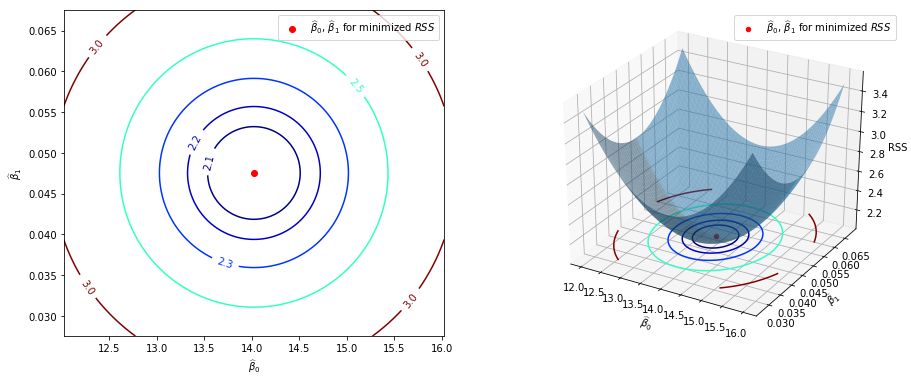

In [3]:
#center the X data
X = X - X.mean()
b1 = ((X - X.mean()) * (y - y.mean())).sum() / ((X - X.mean())**2).sum()
b0 = y.mean() - b1 * X.mean()
print('Intercept: {:.2f}\nSlope: {:.4f}'.format(b0, b1))
print('Minimum RSS: {:.4f}'.format(((y - b0 - b1 * X)**2).sum()))
print('Minimum RSS (in $1,000): {:.4f}'.format(((y - b0 - b1 * X)**2).sum()/1000))
#create a mesh for the coefficients
B0, B1 = np.meshgrid(np.linspace(b0-2, b0+2, 100), np.linspace(b1-0.02, b1+0.02, 100), indexing='xy')
#create a blank numpy array with the same shape as the meshed coefficients
rss = np.zeros_like(B0)
#calculate the RSS for each B0, B1 pair in the meshgrid
for (i, j), v in np.ndenumerate(rss):
    rss[i, j] = ((y - B0[i, j] - B1[i, j] * X)**2).sum()/1000

#need to add the subplots separately since you can't change individual projections 
#with the plt.subplots() command
fig = plt.figure(figsize=(15, 6))
    
#left plot
ax1 = fig.add_subplot(1, 2, 1)
cont = ax1.contour(B0, B1, rss, levels=[2.15, 2.2, 2.3, 2.5, 3], cmap=plt.cm.jet)
ax1.scatter(b0, b1, c='r', label=r'$\widehat{\beta}_0$, $\widehat{\beta}_1$ for minimized $RSS$')
ax1.clabel(cont, inline=True, fintsize=10, fmt='%1.1f');
ax1.set(xlabel=r'$\widehat{\beta}_0$', ylabel=r'$\widehat{\beta}_1$');
ax1.legend()

#right plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(B0, B1, rss, alpha=0.5)
#the offset will plot the contours on the plane of the minimum rss value
ax2.contour(B0, B1, rss, offset=rss.min(), levels=[2.15, 2.2, 2.3, 2.5, 3], cmap=plt.cm.jet);
#like offset above, zs will plot the scatter point on the plane of the minimum rss value
ax2.scatter3D(b0, b1, zs=rss.min(), c='r', label=r'$\widehat{\beta}_0$, $\widehat{\beta}_1$ for minimized $RSS$');
ax2.set(xlabel=r'$\widehat{\beta}_0$', ylabel=r'$\widehat{\beta}_1$', zlabel='RSS');
ax2.legend();

### Assessing the Accuracy of the Coefficient Estimates
Recall that the true relationship between $X$ and $Y$ takes the form $Y = f(X) + \epsilon$ for some unknown function $f$, where $\epsilon$ is a mean-zero random error term. If $f$ is appriximated by a linear function, the relationship can be written as:  

$$Y = \beta_0 + \beta_1X + \epsilon$$  
The error term, $\epsilon$, is a catch-all for what we miss with the simple model. Typically it's assumed that $\epsilon$ is independent of $X$. The equation above defines the *population regression line*. 

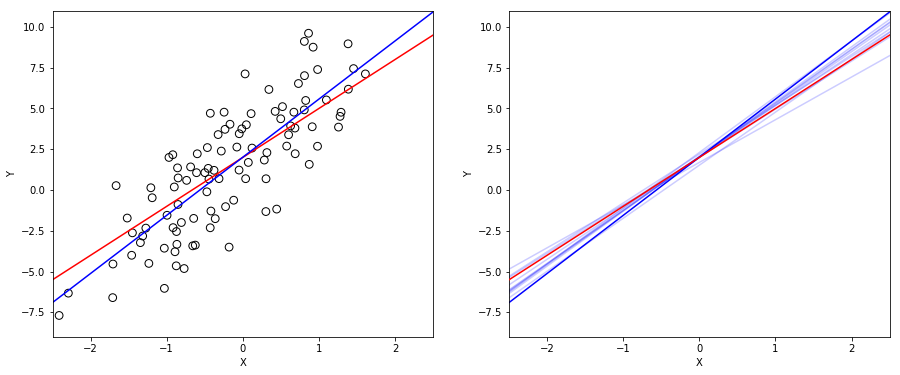

In [4]:
#generate 100 random X values
X = np.random.normal(size=100)
#generate 100 Y values using the model Y = 2 + 3X + epsilon
y = 2 + 3 * X + np.random.normal(scale=2.5, size=100)
#generate the true relationship between X and Y
X_true = np.linspace(-5, 5, 100)
y_true = 2 + 3 * X_true

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#left plot
#find the coefficients for the sample data
b1 = ((X - X.mean()) * (y - y.mean())).sum() / ((X - X.mean())**2).sum()
b0 = y.mean() - b1 * X.mean()
#use the coefficients to predict y
y_pred = b0 + b1 * X_true
#make the plot
ax1.scatter(X, y, s=60, edgecolors='k', facecolors='none')
ax1.plot(X_true, y_true, c='r')
ax1.plot(X_true, y_pred, c='b')
ax1.set(xlim=[-2.5, 2.5], ylim=[-9, 11], xlabel='X', ylabel='Y');

#right plot
ax2.plot(X_true, y_true, c='r', zorder=5)
ax2.plot(X_true, y_pred, c='b')
for i in range(10):
    X = np.random.normal(size=100)
    y = 2 + 3 * X + np.random.normal(scale=2.5, size=100)
    b1 = ((X - X.mean()) * (y - y.mean())).sum() / ((X - X.mean())**2).sum()
    b0 = y.mean() - b1 * X.mean()
    y_pred = b0 + b1 * X_true
    ax2.plot(X_true, y_pred, c='b', alpha=0.2)
ax2.set(xlim=[-2.5, 2.5], ylim=[-9, 11], xlabel='X', ylabel='Y');

In the figure above, we created 100 random $X$s and generated 100 corresponding $Y$s from the model:  

$$Y = 2 + 3X + \epsilon$$  
where $\epsilon$ was generated from a normal distribution with mean zero. In the left panel, the red line represents the true relationship, $f(X) = 2 + 3X$, while the blue line is the least squares estimate based on the observed data. In the right panel, we similarly generated 10 different datasets using the same model and plotted the least squares estimates.  

The difference between the red line and blue lines is a natural extension to the standard statistical approaches of using information from a sample to estimate charactaristics of a large population. For example, suppose that we wanted to know the population mean $\mu$ of some variable $Y$. Unfortunately, $\mu$ is unknown, but we do have $n$ observations of $Y$ which we can use to estimate $\mu$. A reasonable estimate is $\widehat{\mu} = \bar{y}$ where $\bar{y} = \frac{1}{n}\sum_{i=1}^ny_i$ is the sample mean. Although the sample mean and population mean are different, the sample mean will provide a good estimate of the population mean. Similarly, the unknown coefficients $\beta_0$ and $\beta_1$ can be reasonably estimated with $\widehat{\beta}_0$ and $\widehat{\beta}_1$.  

If we use the sample mean $\widehat{\mu}$ to estimate $\mu$, this estimate is *unbiased* in the sense that on average we expect $\widehat{\mu}$ to equal $\mu$. Individual realizations of $\widehat{\mu}$ may over-estimate or under-estimate $\mu$, but if we could average a huge number of estimates of $\widehat{\mu}$, then this average would exactly equal $\mu$. An unbiased estimator does not *systematically* over- or under-estimate the true parameter. The property of unbiasedness holds for the least squares coefficient estimates as well.  

The natural question that follows is: how accurate is the sample mean $\widehat{\mu}$ as an estimate of $\mu$? In other words: how far off will a single estimate of $\widehat{\mu}$ be? In general, we answer this question by computing the *standard error* of $\widehat{\mu}$, written as $SE(\widehat{\mu})$:  

$$Var(\widehat{\mu}) = SE(\widehat{\mu})^2 = \frac{\sigma^2}{n},$$
where $\sigma$ is the standard deviation of each of the realizations $y_i$ of $Y$. This equation shows how this deviation shrinks with increasing $n$. To compute the standard errors associated with $\widehat{\beta}_0$ and $\widehat{\beta}_1$, we use the following formulas:  

$$SE(\widehat{\beta}_0)^2 = \sigma^2\biggr[\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n(x_i - \bar{x})^2}\biggr]\qquad\text{and}\qquad SE(\widehat{\beta}_1)^2 = \frac{\sigma^2}{\sum_{i=1}^n(x_i - \bar{x})^2},$$  
where $\sigma^2 = Var(\epsilon)$. For these formulas to be strictly valid, we need to assume that the errors $\epsilon_i$ are uncorrelated with the common variance $\sigma^2$. A few things to note about the above formulas:  
* $SE(\widehat{\beta}_1)$ is smaller when the $x_i$ are more spread out
 * we have more *leverage* to estimate a slope
* $SE(\widehat{\beta}_0)$ would be the same as $SE(\widehat{\mu})$ if $\bar{x}$ were zero
 * in which case $\widehat{\beta}_0$ would be equal to $\bar{y}$  

The estimate of $\sigma$ is known as the *residual standard error* and is given by the formula $RSE = \sqrt{\frac{RSS}{(n-2)}}$.  

Standard errors can be used to compute *confidence intervals*. For example, a 95% confidence interval is defined as the range of values such that with 95% probabiliy, the range will contain the true unknown value of the parameter. For linear regression, the 95% confidence interval for $\beta_1$ approximately takes the form:  

$$\widehat{\beta}_1 \pm 2 \cdotp SE(\widehat{\beta}_1)$$  
That is, there is approximately a 95% chance that the interval  

$$\biggr[\widehat{\beta}_1 - 2 \cdotp SE(\widehat{\beta}_1), \widehat{\beta}_1 + 2 \cdotp SE(\widehat{\beta}_1)\biggr]$$  
will contain the tru value of $\widehat{\beta}_1$. Similarly, the confidence interval for $\widehat{\beta}_0$ approximately takes the form  

$$\widehat{\beta}_0 \pm 2 \cdotp SE(\widehat{\beta}_0).$$  

Standard errors can also be used to perform *hypothysis tests*, the most common of which involves testing the *null hypothesis* of  

$$H_0: \text{There is no relationship between }X\text{ and }Y$$  
versus the *alternative hypothesis*  

$$H_a: \text{There is some relationship between }X\text{ and }Y$$  
Mathematically, this correspons to testing  

$$H_0: \beta_1 = 0$$  
versus  

$$H_a: \beta_1 \neq 0$$  
since if $\widehat{\beta}_1 = 0$ then the model reduces to $Y = \widehat{\beta}_0 + \epsilon$, and $X$ is not associated with $Y$. To test the null hypothesis, we need to determine whether $\widehat{\beta}_1$ is sufficiently far from zero. If $SE(\widehat{\beta}_1)$ is small, then relatively small values of $\widehat{\beta}_1$ may provide strong evidence that $\beta_1 \neq 0$. If $SE(\widehat{\beta}_1)$ is large, $\widehat{\beta}_1$ must be large in absolute order for us to reject the null hypothesis. In practice, we compute a *t-statistic* with  

$$t = \frac{\widehat{\beta}_1 - 0}{SE(\widehat{\beta}_1)},$$  
which measures the number of standard deviations that $\widehat{\beta}_1$ is away from 0. If there is no relationship we expect to have a t-distribution with $n - 2$ degrees of freedom. It is simple to compute the probability of observing any number equal to $|t|$ or larger in absolute value, assuming $\widehat{\beta}_1 = 0$. This is called the *p-value*. A small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association between the predictor and the response. So if we see a small p-value, we can infer that there is an association between the predictor and the response. We *reject the null hypothesis* - that is, we declare a relationship to exist between $X$ and $Y$. Typical p-value cutoffs for rejecting the null hypothesis are 5% or 1%.

In [5]:
#tables 3.1 and 3.2 using statsmodels
import statsmodels.formula.api as sm
TV_ols = sm.ols('sales ~ TV', advertising).fit()
TV_ols.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [6]:
TV_ols.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Sat, 21 Oct 2017",Prob (F-statistic):,1.47e-42
Time:,06:14:12,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [7]:
#tables 3.1 and 3.2 using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = advertising['TV'].values.reshape(-1, 1)
y = advertising['sales'].values

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
print('Intercept: {:.4f}\nSlope: {:.4f}\nR^2: {:.4f}' \
      .format(lr.intercept_, lr.coef_[0], r2_score(y, y_pred)))

Intercept: 7.0326
Slope: 0.0475
R^2: 0.6119


## Assesing the Accuracy of the Model
After we have rejected the null hypothesis, it is natural to want to quantify the extent to which the model fits the data. The quality of a linear regression fit is typically assessed using two related quantities: *residual standard error* (RSE) and the $R^2$ statistic.  

### Residual Standard Error  
The RSE is the estimate of the standard deviation of $\epsilon$, or the average amount that the response will deviate from the true regression line. It's computed using the formula  

$$RSE = \sqrt{\frac{1}{n - 2}RSS} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n(y_i - \widehat{y}_i)^2}$$  
Another way to think about this is that even if the model were correct and the true values of the unknown coefficients $\beta_0$ and $\beta_1$ were known exacly, any predictions would still be off by about the RSE. The RSE is considered a measure of the lack of fit of the model to the data. That is if $\widehat{y} \approx y_i$ for $i = 1, ..., n$, then RSE will be small and we can conclude that the model fits the data well and vice versa.  

### $R^2$ Statistic  
Since RSE is measured in the units of $Y$, it is not alway clear what constitutes a good RSE. The $R^2$ statistic provides an alternative measure of fit which takes the form of a proportion of variance explained, so it always takes on a value between 0 and 1, and is independent of the scale of $Y$. We calculate $R^2$ with the formula  

$$R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$  
where $TSS = \sum(y_i - \bar{y})^2$ is the *total sum of squares*. TSS measures the total variance in the response $Y$, and can be thought of as the amount of variability inherent in the response before regression is performed. On the other hand, RSS measures the amount of variability that is left unexplained after performing the regression. Hence, TSS - RSS measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^2$ measures the proportion of variability in $Y$ that can be explained using $X$. A number near 1 indicates that a large proportion of the variability in the response has been explained by the regression, while a number near 0 indicates that the regression did not explain much of the variability in the response.  

The $R^2$ statistic is a measure of the linear relationship between $X$ and $Y$. Recall that *correlation* defined as  

$$r = Cor(X, Y) = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n(y_i - \bar{y})^2}}$$  
is also a measure of the linear relationship between $X$ and $Y$. For simple linear regression, it can be shown that $R^2 = r^2$. This does not hold true for multiple linear regression because the concept of correlation between the predictors and the response does not extent to using several predictors simultaneously. In this setting $R^2$ will be better suited to fill this role.

# Multiple Linear Regression
Normally, we have more than one predictor to model the response as opposed to a single predictor for simple linear regression. The approach of fitting a separate simple linear regression model for each predictor is not satisfactory since (1) it is unclear how to make a single prediction of sales given multiple predictors and (2) each of the regression equations ignores the other predictors when forming estimates for the regression coefficients. If the predictors are correlated with each other, this can lead to very misleading estimates of the response. 

Instead, we will extend the simple linear regression model so that it can directly accomodate multiple predictors. We do this by giving each predictor a separate slope coefficient in a single model. If we have $p$ distinct preditors, the multiple linear regression model takes the form  

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon,$$  
where $X_j$ represents the $j$th predictor and $\beta_j$ quantifies the association between that variable and the response. We interpret $\beta_j$ as the average effect on $Y$ of a one unit increase in $X_j$ holding all other predictors fixed.

In [8]:
#table 3.3
#import statsmodels.formula.api as sm <- already imported
radio_ols = sm.ols('sales ~ radio', advertising).fit()
radio_ols.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [9]:
newspaper_ols = sm.ols('sales ~ newspaper', advertising).fit()
newspaper_ols.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


## Estimating the Regression Coefficients
Since the regression coefficients $\beta_0, \beta_1, ..., \beta_p$ are unknown, they must be estimated with $\widehat{\beta}_0, \widehat{\beta}_1, ..., \widehat{\beta}_p$. Then we can make predictions using the formula  

$$\widehat{y} = \widehat{\beta}_0 + \widehat{\beta}_1x_1 + \widehat{\beta}_2x_2 + ... + \widehat{\beta}_px_p$$  
The parameters are estimated using the same least squares approach as in simple linear regression. We choose $\beta_0, \beta_1, ..., \beta_p$ to minimize the sum of squared residuals  

$$RSS = \sum_{i=1}^n(y_i - \widehat{y}_i)^2$$

$$= \sum_{i=1}^n(y_i - \widehat{\beta}_0 - \widehat{\beta}_1x_{i1} - \widehat{\beta}_2x_{i2} - ... - \widehat{\beta}_px_{ip})^2$$  
or equivalently  

$$= \sum_{i=1}^n\biggr(y_i - (\widehat{\beta}_0 + \sum_{j=1}^p\widehat{\beta}_jX_{ij})\biggr)^2$$

### (Supplement) Deriving the Multiple Linear Regression Coefficients
Because the multiple regression coefficient estimates take on a somewhat complicated form, they are best represented using matrix algebra. Let 

$$
\textbf{y} = \begin{bmatrix}
y_1\\
y_2\\
\vdots
\\y_n
\end{bmatrix}
\qquad\text{,}\qquad
\textbf{X} = \begin{bmatrix}
1&x_{11}&x_{12}&\cdots&x_{1p}\\
1&x_{21}&x_{22}&\cdots&x_{2p}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x_{n1}&x_{n2}&\cdots&x_{np}
\end{bmatrix}
$$  

$$
\widehat{\beta} = \begin{bmatrix}
\widehat{\beta_0}\\
\widehat{\beta_1}\\
\vdots\\
\widehat{\beta_p}
\end{bmatrix}
\qquad\text{,}\qquad
\epsilon = \begin{bmatrix}
\epsilon_1\\
\epsilon_2\\
\vdots\\
\epsilon_n
\end{bmatrix}
$$  

With this compact notation, we can rewrite the multiple linear regression formula as  

$$\textbf{y} = \textbf{X}\beta + \epsilon$$  

And the RSS as  

$$RSS = \sum_{i=1}^n\epsilon^2 = \sum_{i=1}^n(\textbf{y} - \widehat{\beta}\textbf{X})^2$$

which in linear algebra is equivalent to  

$$RSS = \epsilon^t\epsilon = (\textbf{y} - \widehat{\beta}\textbf{X})^t(\textbf{y} - \widehat{\beta}\textbf{X})$$

$$= (\textbf{y}^t - \widehat{\beta}^t\textbf{X}^t)(\textbf{y} - \widehat{\beta}\textbf{X})$$  

$$= \textbf{y}^t\textbf{y} - \widehat{\beta}^t\textbf{X}^ty - \textbf{y}^t\textbf{X}\widehat{\beta} + \widehat{\beta}^t\textbf{X}^t\textbf{X}\widehat{\beta}$$  
and because the trasnspose of a $1 \times 1$ matrix is the same term, e.g. $\widehat{\beta}^t\textbf{X}^t\textbf{y} = (\widehat{\beta}^t\textbf{X}^t\textbf{y})^t = \textbf{y}^t\textbf{X}\widehat{\beta}$ we are left with  

$$RSS = \textbf{y}^t\textbf{y} - 2\widehat{\beta}^t\textbf{X}^t\textbf{y} + \widehat{\beta}^t\textbf{X}^t\textbf{X}\widehat{\beta}$$

As with simple linear regression, we want to choose the coefficients such that $\frac{\partial{RSS}}{\partial\widehat{\beta}} = 0$. Mathematically, this becomes  

$$\frac{\partial{RSS}}{\partial\widehat{\beta}} = -2\textbf{X}^t\textbf{y} + 2\textbf{X}^t\textbf{X}\widehat{\beta} = 0$$  

Dividing through by 2 and rearranging we get  

$$\textbf{X}^t\textbf{X}\widehat{\beta} = \textbf{X}^t\textbf{y}$$  

Now multiplying both sides by the inverse of $\textbf{X}^t\textbf{X}$ we get the final form of $\widehat{\beta}$ as  

$$\boxed{\widehat{\beta} = (\textbf{X}^t\textbf{X})^{-1}\textbf{X}^t\textbf{y}}$$

In [10]:
#table 3.4
advertising_ols = sm.ols('sales ~ TV + radio + newspaper', advertising).fit()
advertising_ols.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [11]:
#table 3.5
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [12]:
#table 3.6
advertising_ols.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,570.3
Date:,"Sat, 21 Oct 2017",Prob (F-statistic):,1.58e-96
Time:,06:14:12,Log-Likelihood:,-386.18
No. Observations:,200,AIC:,780.4
Df Residuals:,196,BIC:,793.6
Df Model:,3,,
Covariance Type:,nonrobust,,


## Some Important Questions
When performing multiple linear regression, we are usually interested in answering a few questions:  
1. *Is at least one of the predictors $X_1, X_2, ..., X_p$ useful for predicting the response?*<br><br>
2. *Do all the predictors help to explain $Y$, or is only a subset of the predictors useful?*<br><br>
3. *How well does the model fit the data?*<br><br>
4. *Given a set of predictor values, what response value should we predict, and how accurate is our prediction?*<br><br>

### 1 - Is There a Relationship Between the Response and the Predictors?
Essentially we are setting up a hypothesis test with the null hypothesis being that all regression coefficients are equal to zero:  

$$H_0: \beta_1 = \beta_2 = ... = \beta_p = 0$$  
versus  

$$H_a: \text{at least one }\beta_j\text{ is non-zero}$$  

This hypothesis test is performed by computing the *F-statistic*:  

$$F = \frac{(TSS - RSS)/p}{RSS/(n - p - 1)}$$  

where $TSS = \sum(y_i, \bar{y})^2$ and $RSS = \sum(y_i - \widehat{y}_i)^2. If the linear model assumptions are correct, we can show that  

$$\mathbb{E}\{RSS / (n-p-1)\} = \sigma^2$$  

and that, provided $H_0$ is true,  

$$\mathbb{E}\{(TSS - RSS) / p\} = \sigma^2$$. 

So when there is no relationship between the response and predictors, the F-statistic should be close to 1. However, if $H_a$ is true, then $\mathbb{E}{(TSS - RSS)/p} > \sigma^2$, so we expect $F$ to be greater than 1.  

In table 3.6 the F-statistic is 570, which provides compelling evidence against the null hypothesis, i.e. the large F-statistic suggests that at least one of the advertising media must be related to sales. For any value of $n$ and $p$, the p-value associated with the F-statistic can help us determine whether or not to reject $H_0$. 

Sometimes we want to test to see if a particular subset of $q$ coefficients are zero. The null hypothesis would be  

$$H0: \beta_{p-q+1} = \beta_{p-q+2} = ... = \beta_p = 0$$. 

Suppose the residual sum of squares for the subset of coefficients is $RSS_0$, then the F-statistic would be  

$$F = \frac{(RSS_0 - RSS) / q}{RSS / (n - p - 1)}$$  

Given the individual p-values for each variable, why do we need to look at the F-statistic? When $p$ is large, about 5% of the p-values will be below 0.05 by chance. So there would be a very high chance that we will incorrectly conclude that there is a relationship where there is not. The F-statistic does not suffer from this problem because it adjusts for the number of predictors. Hence if $H_0$ is true, there is only a 5% chance that the F-statistic will result in a p-value below 0.05, regardless of the number of predictors or observations.  

### 2 - Deciding on Important Variables
If by looking at the F-statistic and p-value in a multiple regression analysis we conclude that at least one of the predictors is related to the response, the next question is *which* predictors are the guilty ones. The task of determining which predictors are associated with the response, in order to fit a single model involving only those predictors, is referred to as *variable selection*. For $p$ predictors there are a total of $2^p$ different models that can be constructed. Since we can't consider all the models, we need an automated and efficient approach to choose a smaller set of models to consider:  
* *Forward selection*: begin with a *null model* that contains an intercept but no predictors. We then fit $p$ simple linear regressions and add the model that results in the lowest RSS. We then add to that model the variable that results in the lowest RSS for the new two-variable model. This approach is continued until some stopping rule is satisfied.  
* *Backward selection*: start with all variables in the model, and remove the variable with the largest p-value. The new model with $p-1$ variables is fit, and the variable with the largest p-value is removed. This procedure continues until a stopping rule is reached.  
* *Mixed selection*: this is a combination of forward and backward selection. Start with no variables in the model, and as with forward selection, add the variable that provides the best fit. We continue to add variables one-by-one until the p-values rise above a certain threshold, then we remove that variable from the model. We continue this until all variables in the model have sufficiently low p-values, and all variables outside the model would have a large p-value if added to the model.  

Backward selection cannot be used if $p > n$ while forward selection can always be used. Forward selection is a greedy approach, meaning that it might contain variables early that later become redundant. Mixed selection can remedy this. 

### 3 - Model Fit
The most common numerical measures of fit are RSE and $R^2$ (the fraction of variance explained). In simple linear regression $R^2$ is the square of the correlation of the response and the variable. In multiple linear regression, $R^2$ equals $Cor(Y, \widehat{Y})^2$, the square of the corelation between the response and the fitted linear model. 

$R^2$ will always increase when more variables are added to the model, even if those variables are only weakly associated with the response. When adding a variable to the model results in just a tiny increase in $R^2$, this provides additional evidence that the variable can be dropped. If adding a variable to the model results in a substantial improvement in $R^2$, this implies that the model is better with the variable than without. One could further quantify this improvement by looking at the p-values for each variable. 

How can RSE increase when adding new variables to the model given that RSS must decrease? In general RSE is defined as. 

$$RSE = \sqrt{\frac{1}{n-p-1}RSS}$$  

So models can have a higher RSE if the decrease in RSS is small relative to the increase in $p$.  

It can also be useful to plot the data. This can reveal problems with a model that are not visible from numerical statistics. 

In the figure below, we see that some observations lie above and some lie below the least squares regression plane. In particular, the linear model seems to overestimate sales for instances in which most of the advertising money was spent exclusively on either TV or radio. It underestimates sales for instances where the budget is split between two media. The pronounced non-linear pattern cannot be modeled accurately using linear regression since it suggests a *synergy* or *interaction* effect between the advertising media.

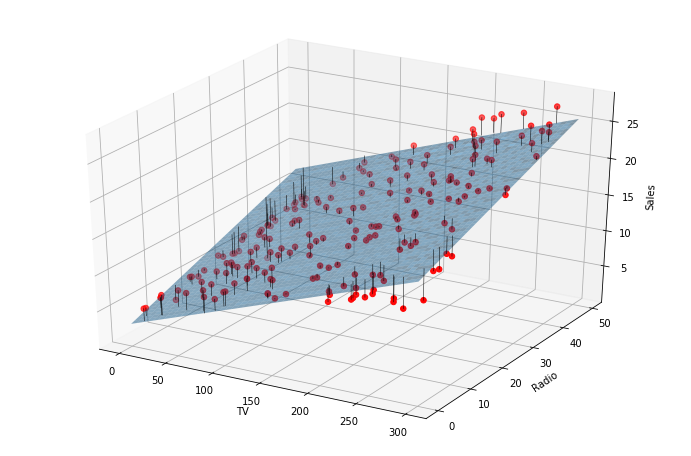

In [13]:
#Create the meshgrid based on min/max values for tv and radio
#print(advertising[['TV', 'radio']].describe())
tv = np.arange(0, 300)
radio = np.arange(0, 50)
radio_grid, tv_grid = np.meshgrid(radio, tv)
sales_grid = np.zeros((tv.shape[0], radio.shape[0]))

#Create the linear model
X = advertising[['TV', 'radio']].values
y = advertising['sales'].values
lr = LinearRegression()
lr.fit(X, y);

#predict sales at each mesh point
for (i, j), v in np.ndenumerate(sales_grid):
    sales_grid[i, j] = (lr.intercept_ + lr.coef_[0] * tv_grid[i, j] + \
                        lr.coef_[1] * radio_grid[i, j])
    
#make the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(tv_grid, radio_grid, sales_grid, alpha=0.5)
ax.scatter3D(advertising['TV'], advertising['radio'], advertising['sales'], 
             c='r', zorder=5, s=30);
ax.set(xlabel='TV', ylabel='Radio', zlabel='Sales');

#plot the residuals
sales_pred = lr.predict(X)
for i in range(len(advertising)):
    #make points for x (tv), y (radio), and z (sales)
    tv = [advertising.iloc[i]['TV'], advertising.iloc[i]['TV']]
    radio = [advertising.iloc[i]['radio'], advertising.iloc[i]['radio']]
    sales = [advertising.iloc[i]['sales'], sales_pred[i]]
    #now plot the line from the observed point to the predicted point (on the plane)
    ax.plot(tv, radio, sales, color='black', linewidth=0.5)

### 4 - Predictions
Once we have fit the multiple regression model, it's easy to predict the response $Y$ on the basis of a set of values for the predictors $X_1, X_2, ..., X_p$. However there are three sorts of uncertainty associated with this prediction.  
 1. The *least squares plane*  
$$\widehat{Y} = \widehat{\beta}_0 + \widehat{\beta}_1X_1 + ... + \widehat{\beta}_pX_p$$  
is only an estimate for the *true population regression plane*  
$$f(X) = \beta_0 + \beta_1X_1 + ... + \beta_pX_p$$  
The inaccuracy in the coefficient estimates is related to the *irreducible error*. We can compute the *confidence interval* in order to determine how close $\widehat{Y}$ will be to $f(X)$.  

 2. In practice assuming a linear model for $f(X)$ is almost always an approximation of reality, so there is an additonal source of potentially redicible error called the *model bias*. Here, we will ignore this discrepancy and operate as if the linear model were correct.  

 3. Even if we knew the true values for $\beta_0, \beta_1, ..., \beta_p$, the response value cannot be predicted perfectly because of the random error $\epsilon$. We use *prediction intervals* to answer the question of how much $Y$ will vary from $\widehat{Y}$. Prediction intervals are always wider than confidence intervals, because the incorporate both the error in the estimate for $f(X)$ and the uncertainty as to how much an individual point will differ from the population regression plane.  

We use confidence intervals to quantify the uncertainty surrounding the *average* sales over a large number of cities. On the other hand, a *prediction interval* can be used to quantify the uncertainty surrounding sales for a *particular* city

# Other Considerations in the Regression Model

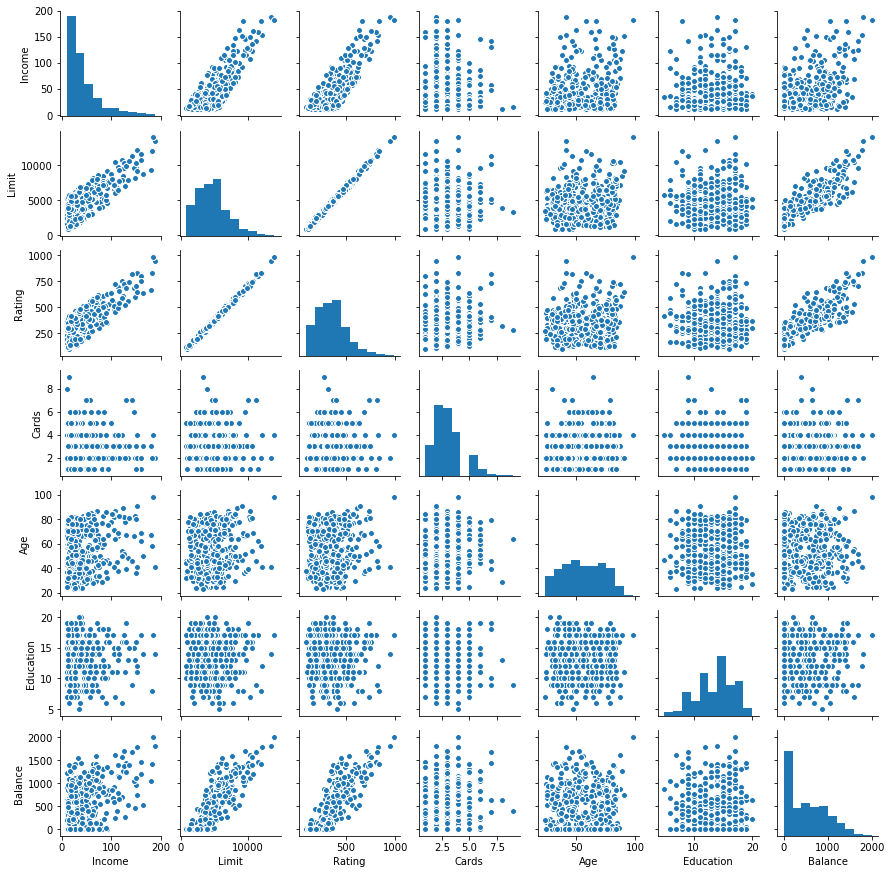

In [14]:
credit = pd.read_csv('../../data/Credit.csv', index_col=0)
pp = sns.pairplot(credit)
pp.fig.set_size_inches(12, 12)

## Qualitative predictors
The **Credit** data set has several quantitative predictors (age, cards, education, income, limit, and rating). There are also four qualitative variables (gender, student, status, and ethnicity). 

### Predictors with Only Two Levels
Suppose we wish to investigate difference in credit card balance between males and females. If a qualitative predictor (also known as a *factor*) has only two levels, then incorporating it into a regression model is very simple. We simply create an indicator or *dummy variable* that takes two possible numerical values:  

$$x_i = \begin{cases}
1 & \text{if }i\text{th person is female}\\
0 & \text{if }i\text{th person is male}
\end{cases}$$  

and use this variable as a predictor in the regression equation. This results in the model  

$$y_i = \beta_0 + \beta_1x_i + \epsilon_i = \begin{cases}
\beta_0 + \beta_1 + \epsilon_i & \text{if }i\text{th person is female}\\
\beta_0 + \epsilon_i & \text{if }i\text{th person is male}
\end{cases}$$  

Now $\beta_0$ can be interpreted as the average credit card balance amond males and $\beta_0 + \beta_1$ as the average credit card balance among females. 

In [15]:
female = np.zeros_like(credit['Gender'])
female[credit['Gender'] == 'Female'] = 1
credit['Female'] = female

credit_ols = sm.ols('Balance ~ Female', credit).fit()
credit_ols.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Female[T.1],19.7331,46.051,0.429,0.669,-70.801,110.267


Alternatively, instead of a 0/1 coding scheme we could create a dummy variable  

$$x_i = \begin{cases}
1 & \text{if }i\text{th person is female}\\
-1 & \text{if }i\text{th person is male}
\end{cases}$$  

and use this variable in the regression equation to get the model  

$$y_i = \beta_0 + \beta_1x_i + \epsilon_i = \begin{cases}
\beta_0 + \beta_1 + \epsilon_i & \text{if }i\text{th person is female}\\
\beta_0 - \beta_1 + \epsilon_i & \text{if }i\text{th person is male}
\end{cases}$$  

It's important to note that the final predictions for credit balances of males and females will be identical regardless of the coding scheme. The only difference is in the way that the coefficients are interpreted. 

### Qualitative Predictors with More than Two Levels
For a qualitative predictor with more than two levels, a single dummy variable cannot represent all possible values. In this situation we can create additional dummy variables. For ethnicity these two dummy variables could be  

$$x_{i1} = \begin{cases}
1 & \text{if }i\text{th person is Asian}\\
0 & \text{if }i\text{th person is not Asian}
\end{cases}$$  

$$x_{i2} = \begin{cases}
1 & \text{if }i\text{th person is Caucasian}\\
0 & \text{if }i\text{th person is not Caucasian}
\end{cases}$$  

Then both of these variables can be used in the regression equation to obtain the model  

$$y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \epsilon_i = \begin{cases}
\beta_0 + \beta_1 + \epsilon_i & \text{if }i\text{th person is Asian}\\
\beta_0 + \beta_2 + \epsilon_i & \text{if }i\text{th person is Caucasian}\\
\beta_0 + \epsilon_i & \text{if }i\text{th person is African American}
\end{cases}$$  

There will always be one fewer dummy variables than the number of levels of a qualitative variable. The level with no dummy variable (African American in this example) is known as the *baseline*. 

In [16]:
asian = np.zeros_like(credit['Ethnicity'])
caucasian = np.zeros_like(asian)
asian[credit['Ethnicity'] == 'Asian'] = 1
caucasian[credit['Ethnicity'] == 'Caucasian'] = 1
credit['Asian'] = asian
credit['Caucasian'] = caucasian

credit_ols = sm.ols('Balance ~ Asian + Caucasian', credit).fit()
credit_ols.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Asian[T.1],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Caucasian[T.1],-12.5025,56.681,-0.221,0.826,-123.935,98.930


In [17]:
credit_ols.summary().tables[0]

Dep. Variable:,Balance,R-squared:,0.000
Model:,OLS,Adj. R-squared:,-0.005
Method:,Least Squares,F-statistic:,0.04344
Date:,"Sat, 21 Oct 2017",Prob (F-statistic):,0.957
Time:,06:14:22,Log-Likelihood:,-3019.3
No. Observations:,400,AIC:,6045.
Df Residuals:,397,BIC:,6057.
Df Model:,2,,
Covariance Type:,nonrobust,,


Although the level selected as the baseling category is arbitrary and the final predictions for each group will be the same regardless of this choice, the p-values do depend on the choice of dummy variable coding. As you can see the p-values associated with the two dummy variables are very large, suggesting no statistical evidence of a real difference in credit card balance between these ethnicities. Rather than relying the individual coefficients, we an use an F-test to test $H_0 : \beta_1 = \beta_2 = 0$, which does not depend on the coding. This F-test has a p-value of 0.957, indicating that we cannot reject the null hypothesis and that there is no relationship between balance and ethnicity.  

There are many different ways of coding qualitative variables besides the dummy variable approach. All of these approaches will lead to equivalent model fits, but the coefficients are different and have different interpretations, and are designed to measure particular *contrasts*.

## Extensions of the Linear Model
The standard linear regression model makes several highly restrictive assumptions that are often violated in practice. The two most import assumptions state that the relationship between the predictors and the response are *additive* and *linear*. The additive assumption means that the effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of other predictors. The linear assumption states that the change in the response $Y$ due to a one-unit increase in $X_j$ is constant, regardless of the value of $X_j$.  

### Removing the Additive Assumption  
As we saw earlier, there seems to be *synergy* or *interaction* effect in the advertising dataset between TV and radio. According to this model  

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon$$  

if we increase $X_1$ by one unit, then $Y$ will increase by an average of $\beta_1$ units. Notice the presence of $X_2$ does not alter this statement. One way of extending this model to allow for interactioin effects is to include a third predictor, called an *interaction term*, which is constructed by computing the product of $X_1$ and $X_2$. This results in the model  

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon$$  

How does this relax the additive assumption? This equation can be rewritten as  

$$Y = \beta_0 + (\beta_1 + \beta_3X_2) + \beta_2X_2 + \epsilon$$  
$$ = \beta_0 + \tilde{\beta}_1X_1 + \beta_2X_2 + \epsilon$$  

where $\tilde{\beta}_1 = \beta_1 + \beta_3X_2$. Since $\tilde{\beta}_1$ changes with $X_2$, the effect of $X_1$ on $Y$ is no longer constant.

In [18]:
advertising['TVxradio'] = advertising['TV'] * advertising['radio']
advertising_ols = sm.ols('sales ~ TV + radio + TVxradio', advertising).fit()
advertising_ols.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TVxradio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [19]:
advertising_ols.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.968
Model:,OLS,Adj. R-squared:,0.967
Method:,Least Squares,F-statistic:,1963.
Date:,"Sat, 21 Oct 2017",Prob (F-statistic):,6.68e-146
Time:,06:14:22,Log-Likelihood:,-270.14
No. Observations:,200,AIC:,548.3
Df Residuals:,196,BIC:,561.5
Df Model:,3,,
Covariance Type:,nonrobust,,


The results above strongly suggest that the model that includes the interaction term is superior to the model that contains only *main* effects. The $R^2$ for this model is 96.8% compared to only 89.7% for the model that predicts sales using TV and radio without an interaction term.  

In this example, the p-values associated with TV, radio, and the interaction term are all statistically significant, so it is obvious that all three variables should be included in the model. However, it is sometimes the case that an interaction term has a very small p-value but the main effects do not. The *hierarchical principle* states that *if we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant*. The idea of creating an interaction term in the multiple regression model extends to qualitative as well as quantitative variables.  

### Non-linear Relationships  
The linear regression model assumes a linear relationship between the response and predictors. But in some cases, the true relationship between the response and the predictors may be non-linear. To accomodate these non-linear relationships, we can extend the linear model using *polynomial regression*. 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


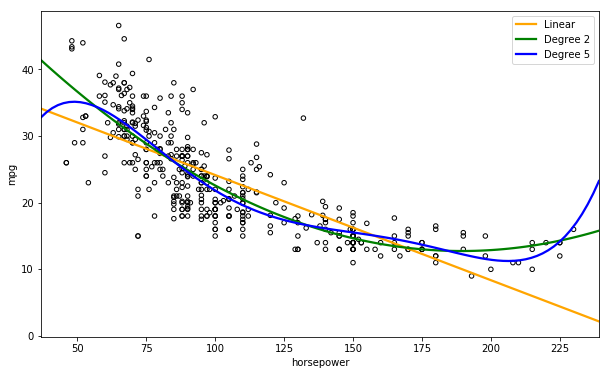

In [20]:
auto = pd.read_csv('../../data/Auto.csv', na_values='?')
plt.figure(figsize=(10, 6))
plt.scatter(auto['horsepower'], auto['mpg'], edgecolors='black', facecolors='none', s=20)
sns.regplot(x=auto['horsepower'], y=auto['mpg'], ci=False, 
            line_kws={'color': 'orange'}, scatter=False)
sns.regplot(x=auto['horsepower'], y=auto['mpg'], ci=False, order=2, 
            line_kws={'color': 'green'}, scatter=False)
sns.regplot(x=auto['horsepower'], y=auto['mpg'], ci=False, order=5,
            line_kws={'color': 'blue'}, scatter=False)
plt.legend(['Linear', 'Degree 2', 'Degree 5']);

auto['horsepower2'] = auto['horsepower'] ** 2
auto_ols = sm.ols('mpg ~ horsepower + horsepower2', auto).fit()
auto_ols.summary().tables[1]

In the auto dataset, there is a pronounced relationship between mpg and horsepower, but it seems clear that the relationship is non-linear. A simple approach for incorporating non-linear association in a linear model is to include transformed version of the predictors in the model:  

$$mpg = \beta_0 + \beta_1 \times horsepower + \beta_2 \times horsepower^2 + \epsilon$$  

This seems to be a substantially better fit than the fit obtained when just the linear term is included. Be careful though, as including polynomials of higher degree will increase the flexibility of the model and will produce a wiggly prediction line that has the potential to overfit the data. 

## Potential Problems
The most common problems when we fit a linear regression model are:  

 1. *Non-linearity of the response-predictor relationship*
 2. *Correlation of error terms*
 3. *Non-constance variance of error terms*
 4. *Outliers*
 5. *High-leverage points*
 6. *Collinearity*
 
### 1 - Non-linearity of the Data
If the true relationship between the response and predictors is non-linear, then virtually all of the conclusions that we draw from the fit as well as predictions are suspect. *Residual plots* are a useful graphical tool for identifying non-linearity. 

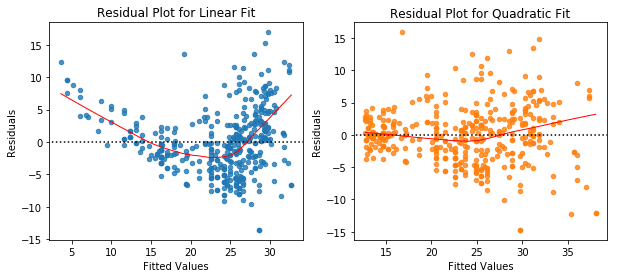

In [21]:
#create two linear regression instances
lr1 = LinearRegression()
lr2 = LinearRegression()
#create two X variables, one for linear, one for quadratic
X1 = auto.dropna()['horsepower'].values.reshape(-1, 1)
X2 = auto.dropna()[['horsepower', 'horsepower2']].values
y = auto.dropna()['mpg'].values
#fit each of the models
lr1.fit(X1, y);
lr2.fit(X2, y);
#make predictions with each of the models
y_pred1 = lr1.predict(X1)
y_pred2 = lr2.predict(X2)
#calculate the residuals of each of the models
res1 = y - y_pred1
res2 = y - y_pred2
#make the plots
#left panel
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.regplot(y_pred1, res1, lowess=True, line_kws={'color': 'red', 'lw': 1}, 
            scatter_kws={'s': 20}, ax=ax1)
ax1.hlines(0, 0, 35, linestyle='dotted')
ax1.set(xlabel='Fitted Values', ylabel='Residuals', 
        title='Residual Plot for Linear Fit');
#right panel
sns.regplot(y_pred2, res2, lowess=True, line_kws={'color': 'red', 'lw': 1}, 
            scatter_kws={'s': 20}, ax=ax2)
ax2.hlines(0, 10, 40, linestyle='dotted');
ax2.set(xlabel='Fitted Values', ylabel='Residuals', 
        title='Residual Plot for Quadratic Fit');

Ideally, the residual plot will show no discernable pattern. The presence of a pattern (as in the left panel of the above plot) indicate a problem with some aspect of the linear model. If the residual plot indicates that there are non-linear associations in the data, then a simple approach is to use non-linear transformations of the predictors, such as $logX$, $\sqrt{X}$, and $X^2$. 

### 2 - Correlation of Error Terms
Assuming that error terms are uncorrelated means that if we know $\epsilon_i$ this gives us little or no information about $epsilon_{i+1}$. If there is correlation among the error terms, then estimates of standard error will tend to underestimate the true standard error. As a result, confidence intervals and prediction intervals will be narrower than they should be. In short, if the error terms are correlated, we may have an unwarrented sense of confidence in our model. Such correlations frequently occur in *time series* data. 

### 3 - Non-constant Variance of Error Terms
Another important assumption of the linear regression model is that the error terms have a constant variance, $Var(\epsilon_i) = \sigma^2$. Unfortunately, it is often the case that the variances of the error terms are non-constant. For instance, the variance of error terms may increase with the value of a response. Non-constant variances in errors is known as *heteroscedasticity* and seen as a *funnel shape* in the residual plot.  

One posible solution is to transform the response $Y$ using a concave function such as $logY$ or $\sqrt{Y}$. This results in a greater amount of shrinkage for the larger responses, leading to a reduction in heteroscedasticity.  

### 4 - Outliers  
An *outlier* is a point for which $y_i$ is far from the value predicted by the model. They can arise for a variety of reasons, such as incorrect recording of an observation during data collection.  

Normally, a single outlier will not have much of an effect on the least squares fit, although it can cause other problems (i.e. increased RSE, decreased $R^2$). It can be difficult to decide how large a residual needs to be before we consider the point to be an outlier. To address this problem, instead of plotting the residuals, we can plot the *studentized residuals* computed by dividing each residual $e_i$ by its estimated standard error. Studentized residuals greater than 3 in absolute value are possible outliers. 

### 5 - High Leverage Points
Observations with *high leverage* have an unusual value of $x_i$. High leverage observations tend to have a sizable impact on the estimated regression line. It is cause for concern if the least squares line is heavily affected by just a couple of observations, because any problems with these points may invalidate the entire fit.  

It's fairly easy to detect high leverage points in simple linear regression, we simply look for observations for which the predictor value is outside of the normal range of observations. But in multiple regression, with many predictors, it is possible to have an observation that is well within the range of each individual predictor's values, but that is unusual in terms of the full set of predictors.  

In order to quantify an observations's leverage, we compute the *leverage statistic*. A large value of this statistic indicates an observation with high leverage. For simple linear regression:  

$$h_i = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_{i=1}^n(x_{i^\prime} - \bar{x})^2}$$  

An observation that has both high studentized residuals and high leverage is a very dangerous observation for the model!

### 6 - Collinearity
Collinearity refers to the situation in which two or more predictor variables are closely related to one another.

[<matplotlib.text.Text at 0x114911e48>, <matplotlib.text.Text at 0x114909080>]

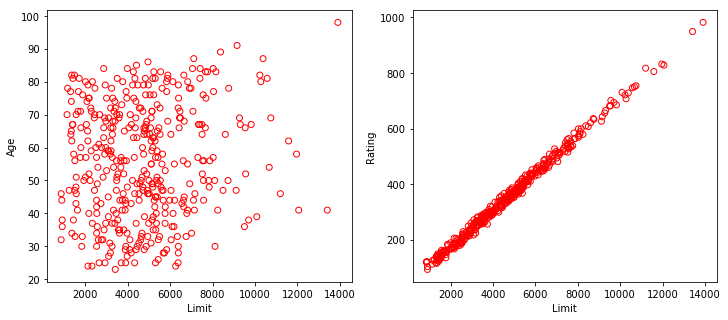

In [22]:
credit = pd.read_csv('../../data/Credit.csv', index_col=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(credit['Limit'], credit['Age'], facecolor='none', edgecolor='r')
ax1.set(xlabel='Limit', ylabel='Age')
ax2.scatter(credit['Limit'], credit['Rating'], facecolor='none', edgecolor='r')
ax2.set(xlabel='Limit', ylabel='Rating')

The left panel of the figure above shows no collinearity while the right panel shows that the variables are highly correlated with each other, and we say that they are *collinear*. 

Regression 1: Intercept=520.0150, Coefficients=[-2.29148553  0.17336497]
Regression 2: Intercept=520.0150, Coefficients=[ 2.20167217  0.02451438]


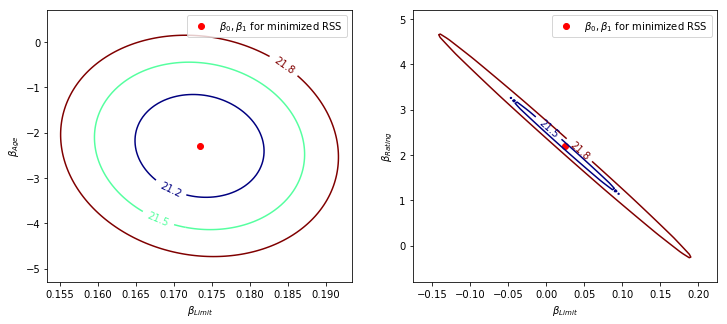

In [23]:
#figure 3.15

#create the scaled predictors
age = (credit['Age'] - credit['Age'].mean()).values
limit = (credit['Limit'] - credit['Limit'].mean()).values
rating = (credit['Rating'] - credit['Rating'].mean()).values
#create the X and y vectors for modeling
X1 = np.array([age, limit]).T
X2 = np.array([rating, limit]).T
y = credit['Balance'].values
#fit a linear regression to each vector pair
lr1 = LinearRegression()
lr2 = LinearRegression()
lr1.fit(X1, y)
lr2.fit(X2, y)
#print the coefficients to create the coefficient grid
print('Regression 1: Intercept={:.4f}, Coefficients={}' \
      .format(lr1.intercept_, lr1.coef_))
print('Regression 2: Intercept={:.4f}, Coefficients={}' \
      .format(lr2.intercept_, lr2.coef_))
#make continuous variables for the coefficients for meshing
b_age = np.linspace(lr1.coef_[0]-3, lr1.coef_[0]+3, 100)
b_limit = np.linspace(lr1.coef_[1]-0.02, lr1.coef_[1]+0.02, 100)
b_rating = np.linspace(lr2.coef_[0]-3, lr2.coef_[0]+3, 100)
b_limit2 = np.linspace(lr2.coef_[1]-0.2, lr2.coef_[1]+0.2, 100)
#create the X and Y meshes
X1, Y1 = np.meshgrid(b_limit, b_age)
X2, Y2 = np.meshgrid(b_limit2, b_rating)
#create the Z meshes
Z1 = np.zeros((b_age.size, b_limit.size))
Z2 = np.zeros((b_rating.size, b_limit2.size))
#Calculate the Z's at each point on the X, Y grids
for (i, j), v in np.ndenumerate(Z1):
    Z1[i, j] = ((y - (lr1.intercept_ + X1[i, j] * limit + Y1[i, j] \
                 * age))**2).sum()/1000000
for (i, j), v in np.ndenumerate(Z2):
    Z2[i, j] = ((y - (lr2.intercept_ + X2[i, j] * limit + Y2[i, j] \
                 * rating))**2).sum()/1000000
#create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
#left plot
cont1 = ax1.contour(X1, Y1, Z1, cmap=plt.cm.jet, levels=[21.25, 21.5, 21.8])
ax1.clabel(cont1, inline=True, fontsize=10, fmt='%1.1f')
ax1.scatter(lr1.coef_[1], lr1.coef_[0], c='r')
ax1.set(xlabel=r'$\beta_{Limit}$', ylabel=r'$\beta_{Age}$')
ax1.legend([r'$\beta_0, \beta_1$ for minimized RSS']);
#right plot
cont2 = ax2.contour(X2, Y2, Z2, cmap=plt.cm.jet, levels=[21.5, 21.8])
ax2.clabel(cont2, inline=True, fontsize=10, fmt='%1.1f')
ax2.scatter(lr2.coef_[1], lr2.coef_[0], c='r')
ax2.set(xlabel=r'$\beta_{Limit}$', ylabel=r'$\beta_{Rating}$')
ax2.legend([r'$\beta_0, \beta_1$ for minimized RSS']);

In [24]:
#table 3.11
credit_ols1 = sm.ols('Balance ~ Age + Limit', credit).fit()
credit_ols2 = sm.ols('Balance ~ Rating + Limit', credit).fit()

credit_ols1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-173.4109,43.828,-3.957,0.000,-259.576,-87.246
Age,-2.2915,0.672,-3.407,0.001,-3.614,-0.969
Limit,0.1734,0.005,34.496,0.000,0.163,0.183


In [25]:
credit_ols2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-377.5368,45.254,-8.343,0.000,-466.505,-288.569
Rating,2.2017,0.952,2.312,0.021,0.330,4.074
Limit,0.0245,0.064,0.384,0.701,-0.101,0.150


A simple way to detect collinearity is to look at the correlation matrix of the predictors. Unfortunately, not all collinearity problems can be detected by inspecting the correlation matrix since it is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high collinearity. This is refered to as *multicollinearity*. Instead of inspecting the correlation matrix, a better way to assess multicollinearity is to compute the *variance inflation factor* (VIF).  

$$VIF(\widehat{\beta}_j) = \frac{1}{1 - R_{X_j|X_{-j}}^2}$$  

where $R_{X_j|X_{-j}}^2$ is the $R^2$ from a regression of $X_j$ onto all of the other predictors. if $R_{X_j|X_{-j}}^2$ is close to one, then collinearity is present, and so the VIF will be large. A VIF value that exceeds 5 or 10 indicatees a problematic amount of collinearity.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

X = np.array([age, limit, rating]).T
vars = ['age', 'limit', 'rating']
for i in range(X.shape[1]):
    print('VIF {}: {}'.format(vars[i], vif(X, i)))

VIF age: 1.0113846860681326
VIF limit: 160.59287978597942
VIF rating: 160.66830095856935


There are two simple solutions when faced with collinearity. First, we can just drop one of the problematic variables since the presence of collinearity implies that the informatioin that the variable provides about the response is redundant. Second, we can combine the collinear variables together into a single predictor. 

# Comparison of Linear Regression with K-Nearest Neighbors
Linear regression is a *parametric* approach because it assumes a linear functional form for $f(X)$. Parametric methods are often easy to fit because one need only estimate a small number of coefficients. But, if the specified functional form of $f(X)$ is far from the truth, the parametric method will perform poorly. In contrast, *non-parametric* methods do not explicitly assume a parametric form for $f(X)$, and therby provide an alternative and more flexible approach for performing regression. Here we consider a very popular non-parametric approach, *K-nearest neighbors regression* (KNN regression).  

Given a value for $K$ and a prediction point $x_0$, KNN regression first identifies the $K$ training observations that are closest to $x_0$, represented by $N_0$. It then estimates $f(x_0)$ using the average of all the training responses in $N_0$:  

$$\widehat{f}(x_0) = \frac{1}{K}\sum_{x_i \in N_0}y_i$$  

In general, the optimal value for $K$ will depend on the *bias-variance tradeoff*. A small value of $K$ provides the most flexible fit, which will have low bias but high variance. Larger values of $K$ provide a smoother and less variable fit, however the smoothing may cause bias by masking some of the structure in $f(X)$.  

A parametric approach will outperform a non-parametric approach if the parametric form that has been selected is close to the true form of $f$. A non-parametric approach incurs a cost in variance that is not offset by a reduction in bias for a relationship that is linear. In higher dimension (i.e. $p$ > 1), KNN often performs worse than linear regression.  

The *curse of dimensionality* occurs when the $K$ observations that are nearest to a given test observation $x_0$ are very far away from $x_0$ in $p$-dimensional space when $p$ is large. This leads to a very poor prediction of $f(x_0)$ and hence a poor KNN fit. As a general rule, parametric methods will tend to outperform non-parametric approaches when there is a small number of observations per predictor.